<a href="https://colab.research.google.com/github/abbeymars/AbigailMarsella-AER850Project2/blob/main/Project2_Part5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


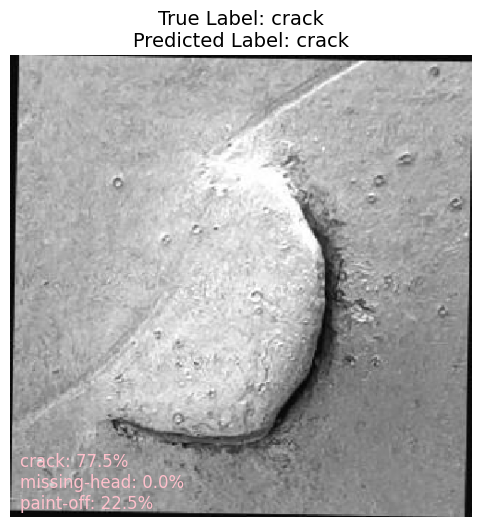

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


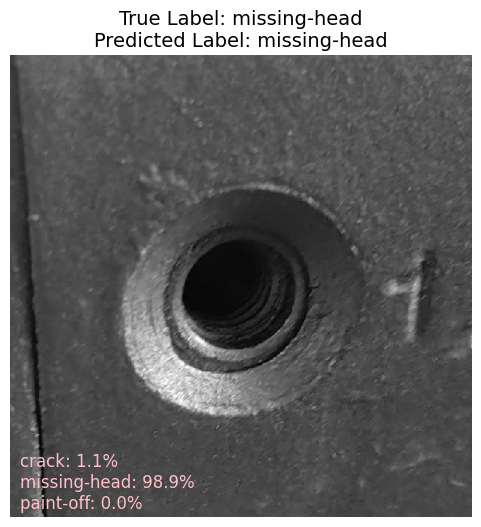

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


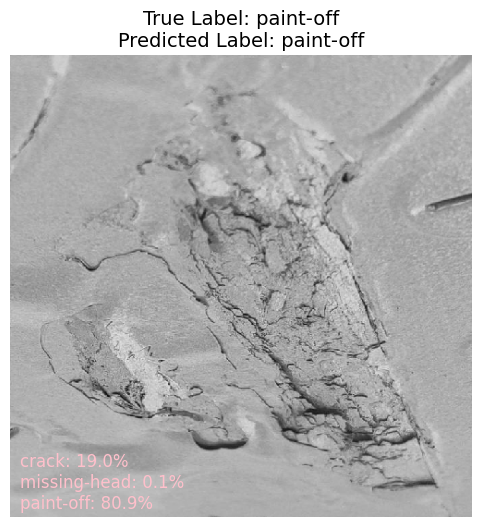

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive

#Step 5: Model Testing
from google.colab import drive
drive.mount('/content/drive') #mount google drive

#Load model (from parts 1-4)
model_path = '/content/drive/My Drive/AER850Proj2/model.h5'
model = tf.keras.models.load_model(model_path)

#Process and Predict Images
def process_and_predict(image_path, model):

    # Load and preprocess the image
    img = load_img(image_path, target_size=(500, 500))  #Resize image
    image_array = img_to_array(img)  #Convert to array
    image_array = image_array.astype('float32') / 255
    image_array = np.expand_dims(image_array, axis=0)

    # Predict the class probabilities
    predictions = model.predict(image_array)
    class_probabilities = predictions[0]
    predicted_class_index = np.argmax(class_probabilities)
    predicted_probability = class_probabilities[predicted_class_index]

    return predicted_class_index, predicted_probability, class_probabilities

#Define test image paths
test_images = {
    "crack": '/content/drive/My Drive/AER850Proj2/Data/test/crack/test_crack.jpg',
    "missing-head": '/content/drive/My Drive/AER850Proj2/Data/test/missing-head/test_missinghead.jpg',
    "paint-off": '/content/drive/My Drive/AER850Proj2/Data/test/paint-off/test_paintoff.jpg'
}

#Define class labels
class_labels = {0: "crack", 1: "missing-head", 2: "paint-off"}

#Visualize Predictions
def display_prediction(image_path, actual_label, predicted_label, class_probabilities, class_labels):

    img = load_img(image_path, target_size=(500, 500))
    plt.figure(figsize=(6, 6))
    plt.imshow(img)  #Use the loaded image
    plt.axis('off')  #Turn off axis
    plt.title(f"True Label: {actual_label}\nPredicted Label: {predicted_label}", fontsize=14)
    prob_text = "\n".join([f"{class_labels[i]}: {class_probabilities[i]*100:.1f}%" for i in range(len(class_probabilities))])
    plt.text(10, 430, prob_text, fontsize=12, color='pink', va='top')
    plt.show()

#Test the model
for label, image_path in test_images.items():
    predicted_class_index, predicted_probability, class_probabilities = process_and_predict(image_path, model)
    predicted_label = class_labels[predicted_class_index]
    display_prediction(image_path, label, predicted_label, class_probabilities, class_labels)
